In [2]:
from plotly.offline import iplot
# download_plotlyjs, init_notebook_mode, plot,
# from plotly.offline import plot
import plotly.graph_objs as go
# import chart_studio.plotly as py
# import requests
import pandas as pd
import numpy as np
import datetime as dt
# from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
# end_date = dt.datetime.now()
# start_date = end_date - dt.timedelta(days=5000)


In [3]:
# Ticker = 'YESBANK.NS'
# df = yf.download(Ticker, start=start_date, end=end_date)
# df.to_csv('Yes_Bank.csv')
# print("Data is saved successfully!")


In [4]:
data = pd.read_csv('Yes_Bank.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-02,59.200001,61.500000,59.200001,61.090000,55.495998,8622720
1,2010-08-03,61.599998,62.369999,61.410000,61.849998,56.186401,9672150
2,2010-08-04,62.270000,62.270000,60.330002,60.720001,55.159874,8660780
3,2010-08-05,60.799999,61.139999,59.599998,59.849998,54.369537,8250495
4,2010-08-06,60.000000,60.730000,59.000000,59.259998,53.833569,5116625


In [5]:
print(data['Date'])


0       2010-08-02
1       2010-08-03
2       2010-08-04
3       2010-08-05
4       2010-08-06
           ...    
3370    2024-04-01
3371    2024-04-02
3372    2024-04-03
3373    2024-04-04
3374    2024-04-05
Name: Date, Length: 3375, dtype: object


In [6]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3.375000e+03
mean,112.084510,113.873081,110.015087,111.860272,108.088377,6.999127e+07
std,103.655891,104.938664,102.136791,103.484710,101.419381,1.108546e+08
min,10.800000,11.000000,5.650000,10.800000,10.800000,0.000000e+00
25%,21.300000,21.775000,20.575000,21.125000,21.125000,1.112031e+07
50%,70.879997,72.169998,69.489998,70.849998,66.097473,2.151006e+07
75%,165.299995,167.955002,162.910004,164.959999,158.298546,8.311562e+07
max,396.799988,404.000000,392.549988,394.000000,388.668457,1.057367e+09


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3375 non-null   object 
 1   Open       3375 non-null   float64
 2   High       3375 non-null   float64
 3   Low        3375 non-null   float64
 4   Close      3375 non-null   float64
 5   Adj Close  3375 non-null   float64
 6   Volume     3375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.7+ KB


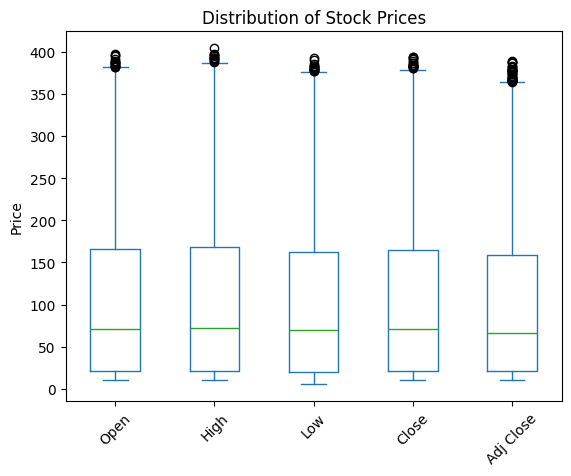

In [9]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')
plt.title('Distribution of Stock Prices')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [9]:
layout = go.Layout(
    title='Stock Prices of Yes Bank',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courler New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courler New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
yes_data = [{'x': data['Date'], 'y': data['Close']}]
plot = go.Figure(data=yes_data, layout=layout)


In [10]:
iplot(plot)


In [11]:
# Building The Regression Model
from sklearn.model_selection import train_test_split
# For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [16]:
x = np.array(data.index).reshape(-1, 1)
y = data['Close']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)\\
print(x_train, end="\n\n")
print(x_test, end="\n\n")
print(y_train, "\n", "Akash", end="\n\n")
print(y_test)
# print(x)


[[ 336]
 [ 792]
 [2600]
 ...
 [1361]
 [1547]
 [ 863]]

[[2183]
 [3138]
 [2666]
 ...
 [1256]
 [ 956]
 [3293]]

336      57.310001
792      69.730003
2600     16.049999
904      78.809998
958     110.709999
           ...    
599      98.440002
1599    279.750000
1361    149.369995
1547    231.490005
863      64.330002
Name: Close, Length: 2362, dtype: float64 
 Akash

2183    117.099998
3138     16.200001
2666     13.400000
233      65.309998
1946    332.950012
           ...    
309      63.139999
299      54.419998
1256    131.850006
956     105.599998
3293     19.750000
Name: Close, Length: 1013, dtype: float64


In [13]:
scaler = StandardScaler().fit(x_train)
scaler


StandardScaler()

In [18]:
from sklearn.linear_model import LinearRegression
# Creating a linear model
lm = LinearRegression()
# lm.fit(x_trau)
lm.fit(x_train, y_train)
print(lm)


LinearRegression()


In [22]:
# Plot the output and predicted values for train dataset
trace0 = go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x=x_train.T[0],
    y=lm.predict(x_train).T,
    mode='lines',
    name='Predicted'
)
yes_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=yes_data, layout=layout)


In [20]:
iplot(plot2)


In [17]:
# Calculate scores for model Calculation
score = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''
print(score)



Metric           Train                Test        
r2_score  0.037387491306349996	0.030855327803193444
MSE       10318.252694970286	10338.855586010168



Creating Model Using LSTM model


In [23]:
testData = data.iloc[:, 4:5]
testData


,Close
0,61.090000
1,61.849998
2,60.720001
3,59.849998
4,59.259998
...,...
3370,24.450001
3371,24.600000
3372,25.400000
3373,24.900000


In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3375 non-null   object 
 1   Open       3375 non-null   float64
 2   High       3375 non-null   float64
 3   Low        3375 non-null   float64
 4   Close      3375 non-null   float64
 5   Adj Close  3375 non-null   float64
 6   Volume     3375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.7+ KB


In [26]:
sc = MinMaxScaler(feature_range=(0, 1))
testData = sc.fit_transform(testData)
testData.shape


(3375, 1)

In [32]:
x_train = []
y_train = []
for i in range(60, 3375):
    x_train.append(testData[i-60:i, 0])
    y_train.append(testData[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)


[[0.13123695 0.13322025 0.1302714  ... 0.15647182 0.16450938 0.16615345]
 [0.13322025 0.1302714  0.12800104 ... 0.16450938 0.16615345 0.16954592]
 [0.1302714  0.12800104 0.12646137 ... 0.16615345 0.16954592 0.16437892]
 ...
 [0.0315762  0.03248956 0.03444676 ... 0.03235908 0.03562109 0.03601253]
 [0.03248956 0.03444676 0.03496869 ... 0.03562109 0.03601253 0.03810021]
 [0.03444676 0.03496869 0.03496869 ... 0.03601253 0.03810021 0.03679541]]
[0.16954592 0.16437892 0.1592641  ... 0.03810021 0.03679541 0.03757829]


In [22]:
# Adding the batch_size axis
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(3315, 60, 1)

In [23]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
# from sklearn.preprocessing import MinMaxScaler
model = Sequential()
model.add(LSTM(units=100, return_sequences=True,
          input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [24]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)


Epoch 1/20
104/104 - 31s - 296ms/step - loss: 0.0082
Epoch 2/20
104/104 - 19s - 179ms/step - loss: 0.0025
Epoch 3/20
104/104 - 19s - 182ms/step - loss: 0.0020
Epoch 4/20
104/104 - 18s - 170ms/step - loss: 0.0025
Epoch 5/20
104/104 - 18s - 171ms/step - loss: 0.0018
Epoch 6/20
104/104 - 22s - 214ms/step - loss: 0.0019
Epoch 7/20
104/104 - 22s - 213ms/step - loss: 0.0017
Epoch 8/20
104/104 - 23s - 217ms/step - loss: 0.0017
Epoch 9/20
104/104 - 22s - 207ms/step - loss: 0.0014
Epoch 10/20
104/104 - 20s - 192ms/step - loss: 0.0014
Epoch 11/20
104/104 - 19s - 185ms/step - loss: 0.0013
Epoch 12/20
104/104 - 20s - 190ms/step - loss: 0.0012
Epoch 13/20
104/104 - 22s - 214ms/step - loss: 0.0012
Epoch 14/20
104/104 - 40s - 384ms/step - loss: 0.0010
Epoch 15/20
104/104 - 17s - 168ms/step - loss: 0.0013
Epoch 16/20
104/104 - 20s - 190ms/step - loss: 0.0011
Epoch 17/20
104/104 - 20s - 188ms/step - loss: 0.0012
Epoch 18/20
104/104 - 20s - 195ms/step - loss: 0.0011
Epoch 19/20
104/104 - 30s - 287ms/ste

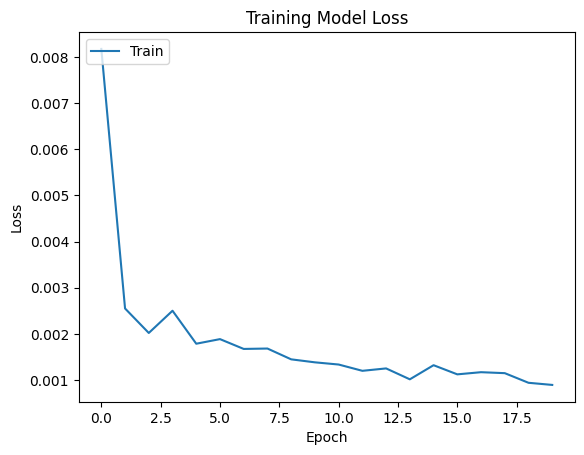

In [25]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')


In [26]:
testData = pd.read_csv('Yes_Bank.csv')
testData['Close'] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5]
y_test = testData.iloc[60:, 0:].values
# testData
# input Array for the model
inputClosing = testData.iloc[:, 0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



(3315, 60, 1)

In [27]:
y_pred = model.predict(X_test)
y_pred


104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step


array([[0.15889445],
       [0.16140904],
       [0.16394794],
       ...,
       [0.04007795],
       [0.04064459],
       [0.04138969]], dtype=float32)

In [28]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price


array([[71.688354],
       [72.65194 ],
       [73.62485 ],
       ...,
       [26.157871],
       [26.375008],
       [26.66053 ]], dtype=float32)

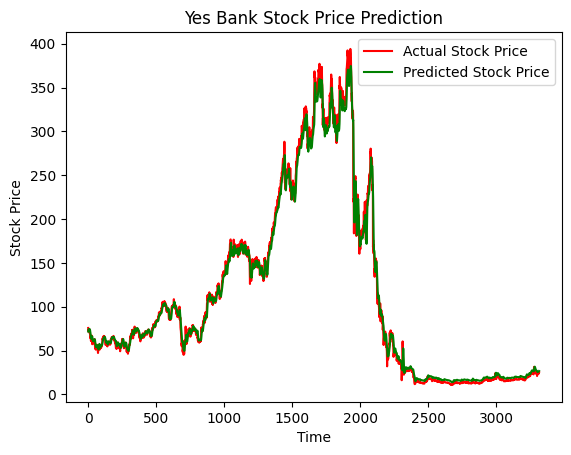

In [29]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Yes Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [83]:
recent_data = data.iloc[:, 4:5]
recent_data = recent_data.tail(60)
recent_data


,Close
3315,24.200001
3316,24.200001
3317,25.500000
3318,25.549999
3319,24.900000
3320,24.750000
3321,25.650000
3322,24.750000
3323,24.950001
3324,25.150000


In [71]:
def update_data(recent_data, next_day_price):
    # Create a new DataFrame containing the predicted price
    new_row = pd.DataFrame({'Close': [next_day_price]})

    # Concatenate the new row with the recent data
    recent_data = pd.concat([recent_data, new_row], ignore_index=True)

    # Remove the oldest price to maintain a fixed window size
    recent_data = recent_data.tail(60)

    return recent_data


In [72]:
def reshape_data(data):
    # Convert data to numpy array if it's not already
    data_array = np.array(data)

    # Reshape data into 3D array (samples, time_steps, features)
    # Assuming 'data_array' has only one feature (closing price)
    num_samples = 1  # We have only one sequence
    # Number of time steps (should be equal to the length of 'data')
    time_steps = data_array.shape[0]
    num_features = 1  # We have only one feature (closing price)

    reshaped_data = data_array.reshape(num_samples, time_steps, num_features)

    # Convert data type to float32 for compatibility with TensorFlow
    reshaped_data = reshaped_data.astype(np.float32)

    return reshaped_data


In [84]:
num_days_to_predict = 15
predicted_prices = []
for _ in range(num_days_to_predict):
    # Reshape recent_data for prediction
    input_data = reshape_data(recent_data)

    # Predict the next day's closing price
    next_day_prediction = model.predict(input_data)

    # Inverse transform the prediction to original scale
    next_day_price = scaler.inverse_transform(next_day_prediction)

    # Append the predicted price to the list
    predicted_prices.append(next_day_price)

    # Update recent_data for the next prediction
    recent_data = update_data(recent_data, next_day_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11024\1222870782.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [85]:
predicted_prices = np.array(predicted_prices)

# Print or visualize the predicted prices for the next 5 days
print("Predicted prices for the next 5 days:")
print(predicted_prices)


Predicted prices for the next 5 days:
[[[4417.988 ]]

 [[4404.229 ]]

 [[4404.432 ]]

 [[4403.0273]]

 [[4402.668 ]]

 [[4402.041 ]]

 [[4401.362 ]]

 [[4400.593 ]]

 [[4399.815 ]]

 [[4399.072 ]]

 [[4398.392 ]]

 [[4397.786 ]]

 [[4397.2583]]

 [[4396.7993]]

 [[4396.4014]]]


In [126]:

last_date = data.tail(1)  # Get the last date from historical data
next_fifteen_days = pd.date_range(last_date.iloc[0, 0], periods=15)
next_fifteen_days
predicted_prices_flat = predicted_prices.flatten()


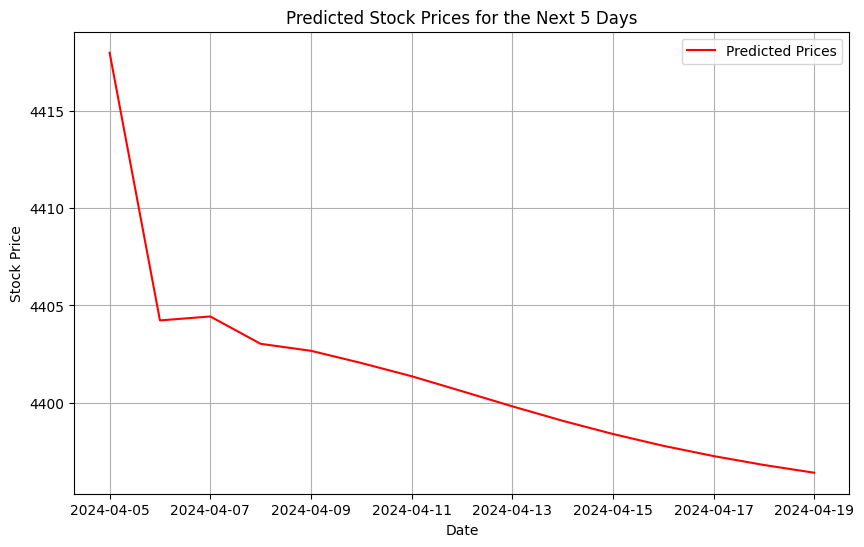

In [127]:
plt.figure(figsize=(10, 6))

# Plot Predicted Prices
plt.plot(next_fifteen_days, predicted_prices_flat,
         linestyle='-', label='Predicted Prices', color='red')

# Add Legends and Labels
plt.title('Predicted Stock Prices for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# next_fifteen_days
